<a href="https://colab.research.google.com/github/nhutHao02/ML_Lab/blob/main/Lab_7_20130252_TranNhutHao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [11]:
# code
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB, ComplementNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from prettytable import PrettyTable
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage





In [15]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Lab'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_Lab


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [3]:
iris = datasets.load_iris()


In [4]:
#code
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf=svm.SVC(kernel='sigmoid', random_state=0)
scores= cross_validate(clf, X, y, scoring='accuracy')
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666667


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [5]:
#code
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
scores= cross_validate(clf, X, y, scoring='accuracy')
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
0.9666666666666668


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [6]:
mnist = datasets.load_digits(as_frame=True)
X = mnist.data
y = mnist.target


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[37.401482160359436, 22.56077488260975, 17.370109472896694, 12.650287676229915, 10.303964892534122, 8.392554481094297, 7.14021543303523, 6.267041825215466, 5.504539750925108, 5.04537436785742]


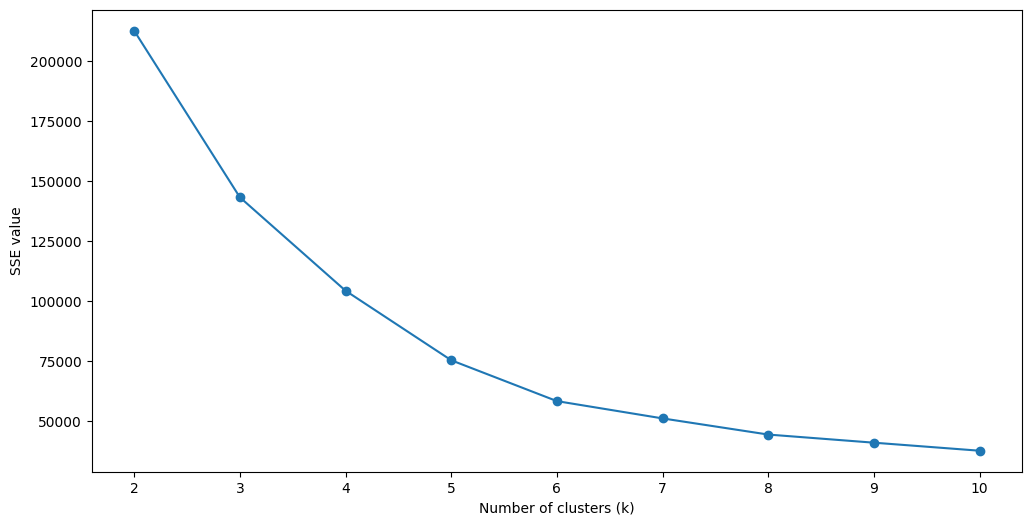

In [26]:
# code
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(X)
clusters = kmeans.predict(X)
kmeans.cluster_centers_.shape

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(X)

sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(x_after_min_max_scaler)
 sse.append(kmeans.inertia_)
print(sse)
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), sse_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE value')
plt.show()

In [8]:
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
 #print(mask)
 labels[mask] = mode(mnist.target[mask])[0]
 #print(labels[mask])
accuracy_score(mnist.target, labels)

<ipython-input-8-a7bd1dacda93>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


0.7935447968836951

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# Randomforest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
scores= cross_validate(clf, X, y, scoring=('accuracy'))
ac=np.mean(scores['test_score'])
scores= cross_validate(clf, X, y, scoring=('precision_macro'))
pr=np.mean(scores['test_score'])
scores= cross_validate(clf, X, y, scoring=('recall_macro'))
rc=np.mean(scores['test_score'])
scores= cross_validate(clf, X, y, scoring=('f1_macro'))
f1=np.mean(scores['test_score'])
print('Accuracy: ', ac)
print('Precision: ', pr)
print('Recall: ', rc)
print('F1: ', f1)
RF=['RF', round(ac,2), round(pr,2), round(rc,2), round(f1,2)]

Accuracy:  0.9466666666666667
Precision:  0.9707070707070707
Recall:  0.96
F1:  0.9664818612187034


In [ ]:
# kNN
k_range = range(1, 30, 2)
acs =[ ]
prs= [ ]
rcs = []
f1s = [ ]
for i in k_range:
  kNM = KNeighborsClassifier(n_neighbors=i);
  kNM.fit(X_train, y_train)
  y_pred = kNM.predict(X_test)
  acs.append(metrics.accuracy_score(y_test, y_pred))
  prs.append(metrics.precision_score(y_test, y_pred, average='macro'))
  rcs.append(metrics.recall_score(y_test, y_pred, average='macro'))
  f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))
  kNN=['RF', round(max(accs),2), round(max(prs),2), round(max(rcs),2), round(max(f1s),2)]

In [ ]:
#NaiveBayes
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
pr = metrics.precision_score(y_test, y_predict, average='macro')
rc = metrics.recall_score(y_test, y_predict, average='macro')
f1 = metrics.f1_score(y_test, y_predict, average='macro')
print('Accuracy: ', ac)
print('Precision: ', pr)
print('Recall: ', rc)
print('F1: ', f1)
NB=['Naive_Bayes', round(ac,2), round(pr,2), round(rc,2), round(f1,2)]

[2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 2 2 0 2 2 0 2 2 2 0
 2 2 2 2 0 2 0 0]
Accuracy:  0.6
Precision:  0.4597701149425288
Recall:  0.6666666666666666
F1:  0.5166666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])

t.add_row(RF)
t.add_row(kNN)
t.add_row(NB)

print(t)

+----------------+----------+-----------+--------+------+
| Classification | Accuracy | Precision | Recall |  F1  |
+----------------+----------+-----------+--------+------+
|       RF       |   0.95   |    0.97   |  0.96  | 0.97 |
|       RF       |   0.98   |    0.97   |  0.98  | 0.98 |
|  Naive_Bayes   |   0.6    |    0.46   |  0.67  | 0.52 |
+----------------+----------+-----------+--------+------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [19]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
# get clustering labels
cluster.labels_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([7, 9, 4, ..., 4, 1, 4])

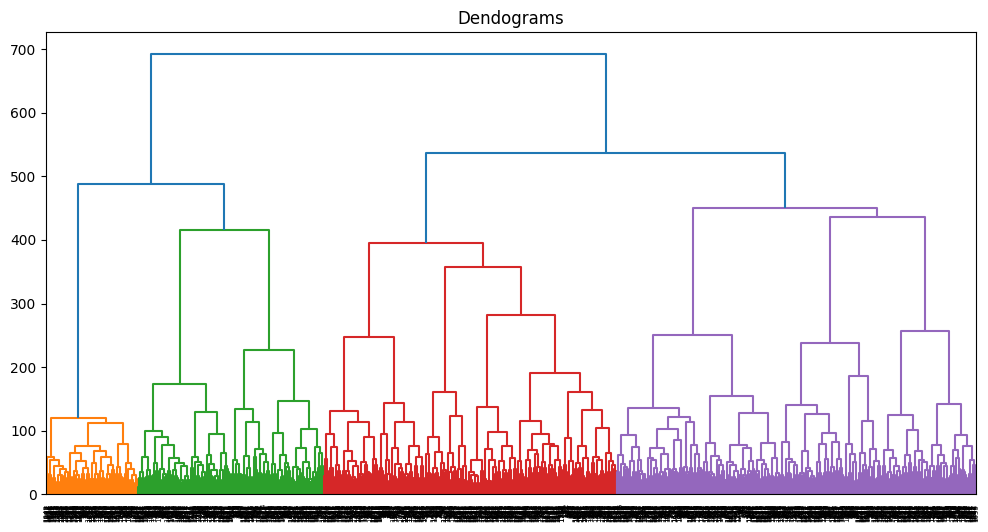

In [20]:
# đenogram
Z = linkage(X, 'ward')
plt.figure(figsize=(12, 6))
plt.title("Dendograms")
dendrogram(Z)
plt.show()


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [17]:
#code
shopping_data = pd.read_csv('shopping-data.csv')
# Drop categorical attributes
shopping_data = shopping_data.drop(['CustomerID', 'Genre'], axis=1)

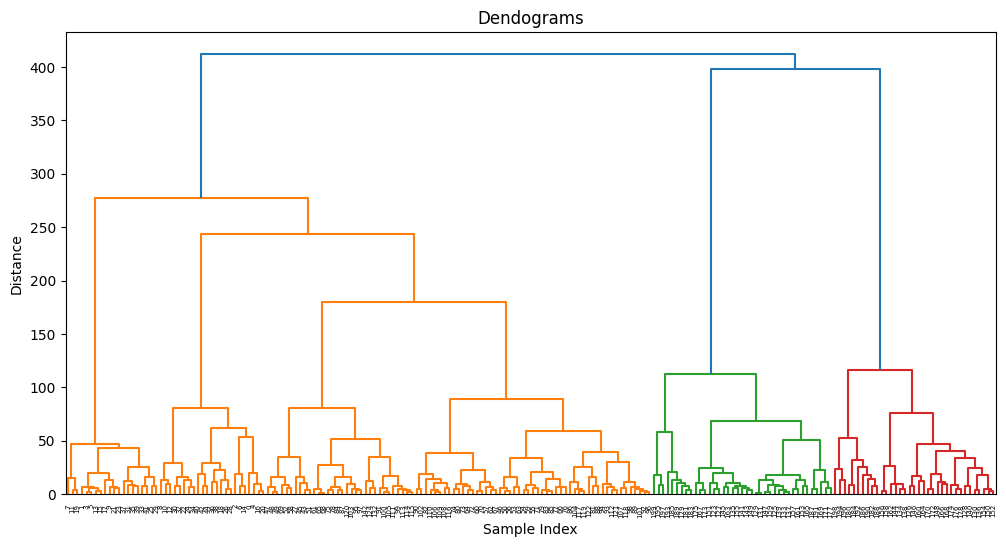

In [23]:
# đenogram
Z = linkage(shopping_data, 'ward')
plt.figure(figsize=(12, 6))
plt.title(' Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title("Dendograms")
dendrogram(Z)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[37.401482160359436, 22.56077488260975, 17.370109472896694, 12.650287676229915, 10.303964892534122, 8.392554481094297, 7.14021543303523, 6.267041825215466, 5.504539750925108, 5.04537436785742]


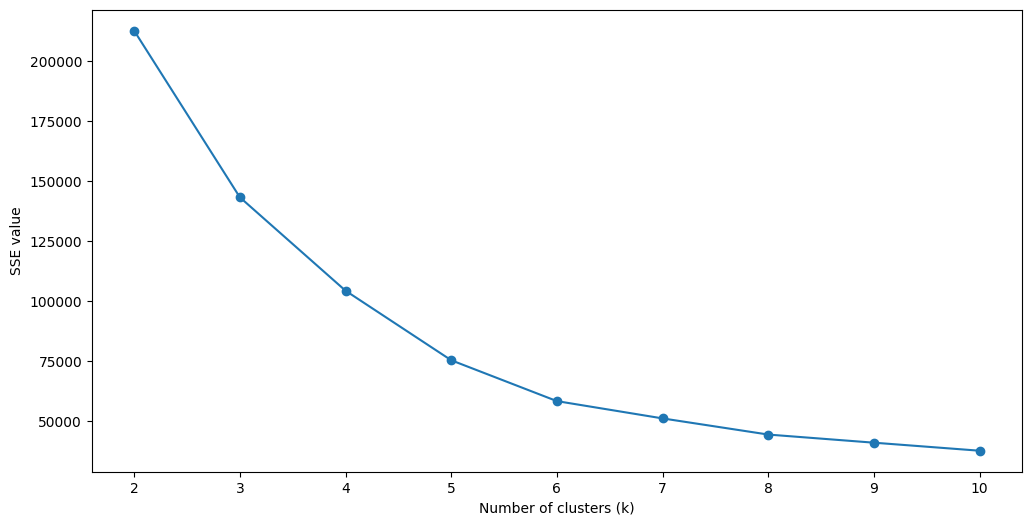

In [27]:
#code
X = shopping_data.values

sse_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse_values.append(kmeans.inertia_)
print(sse)
# Plot SSE values vs k
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), sse_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE value')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [30]:
#code
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

# get clustering labels
print(cluster.labels_)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#Finally,
Save a copy in your Github. Remember renaming the notebook.